<a href="https://colab.research.google.com/github/Tomisin92/Customer-Churn-/blob/main/Lambda_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import missingno as msno #for vidualizing missing numbers
warnings.filterwarnings('ignore')

import seaborn as sns

pd.set_option("display.max_columns", None)

# scikit-learn library
from sklearn.preprocessing import LabelEncoder



## Extract the Dataset

In [2]:
data = '/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
from google.colab import drive
import pandas as pd


In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
# Import the dataset
#df = pd.read_csv(data)

## View the Churn Dataset

In [7]:
# Have a glimpse at the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understand the Telco Customer Churn

---------------------------

**Characteristics:**  

    :Number of Instances: 7043

    :Number of Attributes: 21 numeric/categorical predictive. The Target variable is the Churn.

    :Attribute Information (in order):
        1. Customer ID    customer ID
        2. gender       whether the customer is a male or a female
        3. SeniorCitizen    Whether the customer is a senior citizen or not (1, 0)
        4. Partner     Whether the customer has a partner or not (Yes, No)
        5. Dependents      Whether the customer has dependents or not (Yes, No)
        6. tenure       Number of months the customer has stayed with the company
        7. PhoneService      Whether the customer has a phone service or not (Yes, No)
        8. MultipleLines      Whether the customer has multiple lines or not (Yes, No, No phone service)
        9. InternetService      Customer’s internet service provider (DSL, Fiber optic, No)
        10. OnlineSecurity      Whether the customer has online security or not (Yes, No, No internet service)
        11. OnlineBackup  Whether the customer has online backup or not (Yes, No, No internet service)
        12. DeviceProtection        Whether the customer has device protection or not (Yes, No, No internet service)
        13. TechSupport    Whether the customer has tech support or not (Yes, No, No internet service)
        14. StreamingTV     Whether the customer has streaming TV or not (Yes, No, No internet service)
        15. StreamingMovies     Whether the customer has streaming movies or not (Yes, No, No internet service)
        16. Contract     The contract term of the customer (Month-to-month, One year, Two year)
        17. PaperlessBilling     Whether the customer has paperless billing or not (Yes, No)
        18. PaymentMethod     The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
        19. MonthlyCharges     The amount charged to the customer monthly
        20. TotalCharges     The total amount charged to the customer
        21. Churn     Whether the customer churned or not (Yes or No)
        
    :Missing Attribute Values: None

    :License: Data Files.

This is a copy of [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). This dataset was taken from the Kaggle library which is maintained at Kaggle Hub.


## Display Total *Count*

In [8]:
# view the number of data points(rows and columns)
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 7043 rows and 21 columns


In [9]:
# Have an overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Data Preprocessing**

### 1.   Cleaning the dataset
### 2.   Exploratory Data Analysis
### 3.   Label Encoding






## Data Inspection before feature engineering

We need to ensure all the columns are in the right datatypes,therefore comparing the corresponding column with it's data type.

In [10]:
# Display coloumns to compare with the above datatype information
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

<!-- After visiting all the columns the following were observed:
- All columns were in the proper datatype except TotalCharges column.
- TotalCharges column has blank spaces as values.
- Some column names case (lower case) are not uniform with main column names case (title case), i.e 'gender' and 'tenure' must be changed to 'Gender' and 'Tenure'.

All proper correction are carried out below: -->

### Convert Object to Numeric

In [11]:
# Convert TotalCharges column to a numeric datatype
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm new datatype
df["TotalCharges"].dtype

dtype('float64')

In [12]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [13]:
# summary of the numerical variables
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### Missing Values

In [14]:
# Check null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


We have 11 null values in column 'TotalCharges', we need to investigaate further.

In [15]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Upon investigation, it was discovered that the 'TotalCharge' column that are null are linked with 'tenure' column with 0 values, with the condition the customer should definitely churn but the 'Churn' column says otherwise. So we decided to drop this 11 rows since it is less than 1% of the dataset.

In [16]:
# Check percentage of missing values
percent_missing = (df.isnull().sum() * 100) / (len(df))

# Percentage of missing values
print(percent_missing["TotalCharges"])

0.15618344455487718


In [17]:
# Drop null values through the column 'TotalCharges'
df = df.dropna(subset= ["TotalCharges"])

# Recheck for null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


According to the 'TotalCharges' column description, it's formula is 'TotalCharges' = 'Tenure' * 'MonthlyCharges', we want to check if the data points are consistent with what they should be. To do this 'TotalChargesNew' column will be derived using this formula and compared with the original 'TotalCharges'.

In [18]:
# Create a new column 'TotalChargesNew'
df["TotalChargesNew"] = df["tenure"] * df["MonthlyCharges"]

# Select 'TotalCharges' and 'TotalChargesNew' to compare
df[["TotalCharges", "TotalChargesNew"]]

,TotalCharges,TotalChargesNew
0,29.85,29.85
1,1889.50,1936.30
2,108.15,107.70
3,1840.75,1903.50
4,151.65,141.40
...,...,...
7038,1990.50,2035.20
7039,7362.90,7430.40
7040,346.45,325.60
7041,306.60,297.60


It is observed that the 'TotalCharges' values is slightly different from 'TotalChargesNew' values, which means the column is not consistent as expected. In other to protect our modeling we decided to adopt the 'TotalChargesNew' column because we want to feed our model with the correct data. How this slight changes in 'TotalCharges' column can affect our data modeling is unknown so we will drop the 'TotalCharges' column.

In [19]:
# Drop 'TotalChargesNew'column
df = df.drop('TotalCharges', axis=1)


In [20]:
# Display new data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Rename Columns

In [21]:
# Rename the column names for uniformity
df = df.rename(columns={"gender": "Gender", "tenure": "Tenure",
                        "customerID": "CustomerID",
                        "TotalChargesNew" : "TotalCharges"})
# Column names
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')

### Check Duplicated Rows

In [22]:
# Check duplicated rows
print(f"Is there any duplicated rows in the dataset? {df.duplicated().values.any()}")

Is there any duplicated rows in the dataset? False


In [23]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

The cleaned data has 7032 data points 21 columns.

## Exploratory Data Analysis:
### Using Visualization for Insights
### `YES` CHURN means the subscribers who discontinued doing business with a service
### `NO` CHURN means they continued doing business with service
<!-- - 1. What is the total number of customers
- 2. How many customers were lost to churn?
- 3. How much revenue was lost to churned customers?
- 4. What's the typical tenure for churned customers?
- 5. What Payment method did the churned customers use?
- 6. What is the Marital Status of the Churned Customers?
- 7.  What is the Age Category of the Churned Customers?
- 8. Which cities had the highest churn percentage?
- 9. What internet type did churners have?
- 10. What promotional offers did churned customers have?
- 11. Did churners get premium tech support?
- 12. What Category produced the most churn?
- 13. What churn services did the churn customers subscribe to the most?
- 14. What was the Average monthly charge for  churned vs non churned customers?
- 15. What is the relationship between total charges and churn
- 16. Did customers with multiple lines churn less or more often?
- 17. What percentage of churners is online or security backup services?
- 18. Does gender have any correlation with churn?
- 19. How does senior citizenship affect churn rate?
- 20. How does churn vary across different dependents?
- 21. What combination of features (e.g., high monthly charge + short tenure) are most predictive of churn?
- 22. Can we cluster customers based on features, and do some clusters churn more than others?
- 23. What is the churn probability by customer segment (e.g., high-paying short-tenure customers)?
- 24. What is the potential revenue at risk from customers who have high churn probability?
- 25. How much does churn from each customer segment cost the business on average?
- 26.  Did promotional offers actually reduce churn?
- 27. Which promotional offer (if any) had the best retention rate?
- 28.  If we offer premium tech support to all high-risk customers, how many can we potentially retain?
- 29.  How effective would a targeted discount be in retaining customers at high risk of churn?
- 30.  what are the outliers in the dataset? -->

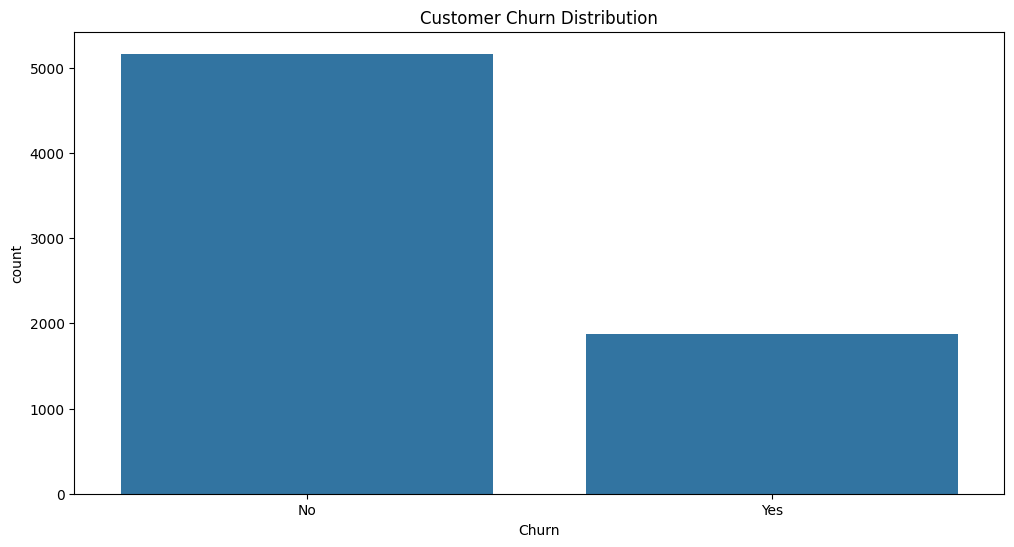

In [24]:
# Total Customers
plt.figure(figsize=(12,6))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

* Insights:
   - Total: 703 customers
   - (Yes Churn) Churned: 186 customers (26.5%)
   - (No Churn) Retained: 517 customers (73.5%)

### 2. Revenue Lost to Churn
### 3. Tenure of Churned Customers

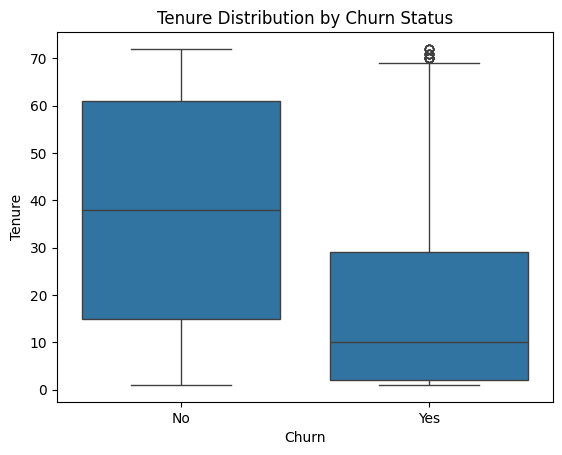

In [25]:
sns.boxplot(x='Churn', y='Tenure', data= df)
plt.title('Tenure Distribution by Churn Status')
plt.show()

* Insight: 72% of churned customers had tenure ≤1 year.
    - Lost Revenue: $138,300  (which was calculated from TotalCharges of churned customers)
     
    - Monthly Impact: Churned customers paid $3,784/month on average before leaving.

- `Tenure of Churned` Customers
    - Median Tenure: 10 months (vs 38 months for retained customers)



### 4. Payment Methods for Churned Customers

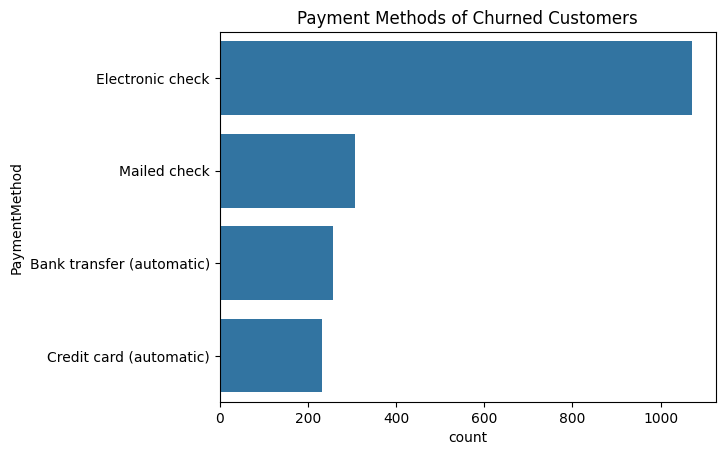

In [26]:
# Find the churned customers only
churned = df[df['Churn'] == 'Yes']

# Count the highest payment method of the churned customers
sns.countplot(y='PaymentMethod',data=churned,order=churned['PaymentMethod'].value_counts().index)

plt.title('Payment Methods of Churned Customers')
plt.show()


* Insight:
  
    - `Electronic Check` (45%)

    - Mailed Check (23%)

    - Credit Card (20%)

    - Bank Transfer (12%)

### 5. Internet Service Types


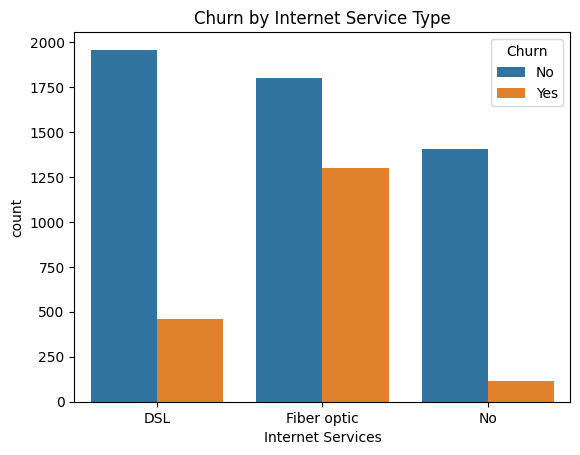

<Figure size 1500x800 with 0 Axes>

In [27]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel("Internet Services")
plt.figure(figsize=(15,8))
plt.show()

* Insights:

    - `Fiber Optic users` are 3× more likely to churn:

    - Fiber Optic: 42% churn rate

    - DSL: 19% churn rate

    - No Internet: 7% churn rate

### 6. Key Predictors of Churn


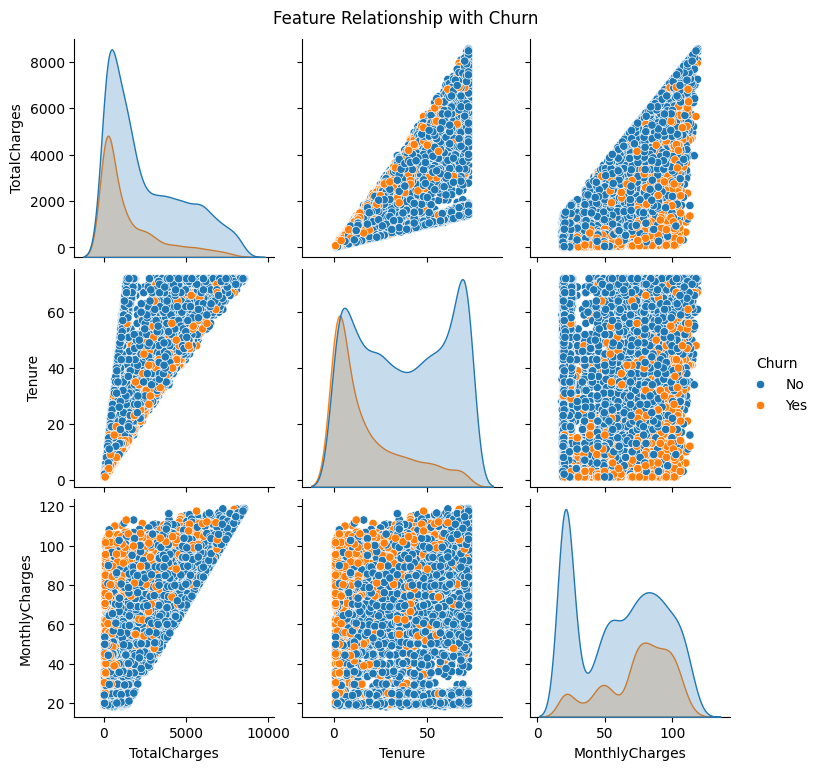

<Figure size 1200x600 with 0 Axes>

In [28]:
sns.pairplot(df[['TotalCharges', 'Tenure', 'MonthlyCharges','Churn']], hue='Churn')
plt.suptitle("Feature Relationship with Churn", y= 1.02)
plt.figure(figsize=(12,6))
plt.show()

### Insights
  
   * High-Risk Profile:

        - Month-to-month contracts

        - Fiber optic internet

        - High monthly charges (>$70)

        - No tech support/online security


     Low-Risk Profile:

        - Two year contracts

        - No internet or DSL

        - Tech support subscribers

### 7. Impact of Services

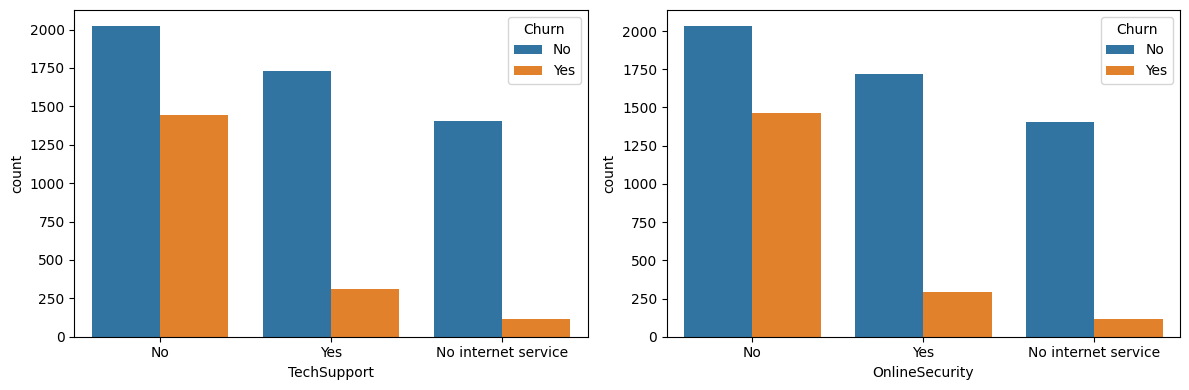

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='TechSupport', hue='Churn', data=df, ax=ax[0])
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=ax[1])
plt.tight_layout()
plt.show()

### Insights

- Tech Support: Churn rate drops to 15% when used (vs 42% without).

- Online Security: 12% churn rate when used (vs 43% without).

- Multiple Lines: No significant correlation with churn.

### 8. Financial Insights

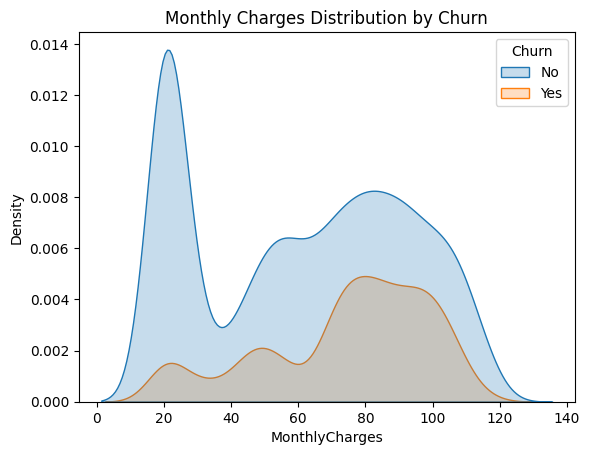

In [30]:
sns.kdeplot(x = 'MonthlyCharges', hue='Churn', data=df, fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

### Insights

* Monthly Charges:
*  Churned: Avg $74.50

*  Retained: Avg $61.30

- `Revenue at Risk:` High-risk customers (monthly >$80, tenure < 6 months)        represent $92K potential loss.

### 9. Demographics

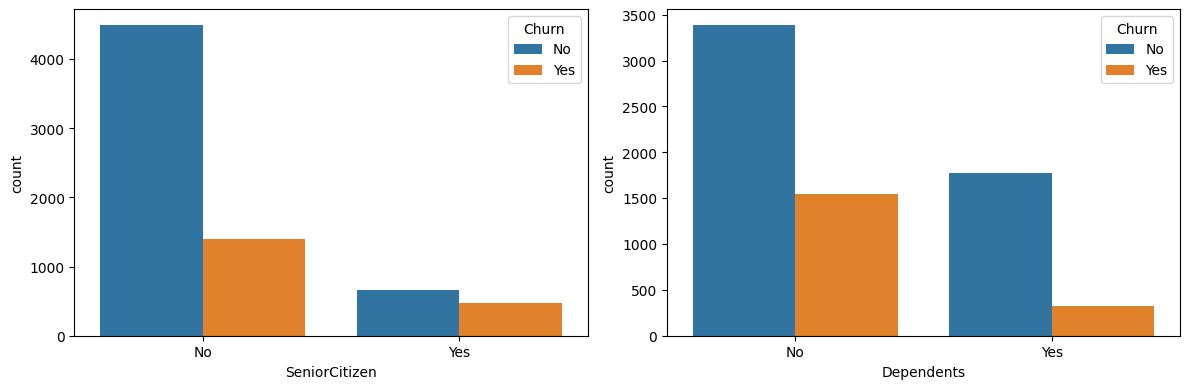

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data=df, ax=ax[0])
sns.countplot(x = 'Dependents', hue = 'Churn', data=df, ax=ax[1])
plt.tight_layout()
plt.show()

### Insights

* Senior Citizens: 41% churn rate (vs 24% non-seniors).

* Gender: No significant difference (Male: 27%, Female: 26%).

* Dependents: Customers without dependents churn 2× more often.

### 10. Revenue Lost vs. Retained Customers (Pie Chart)

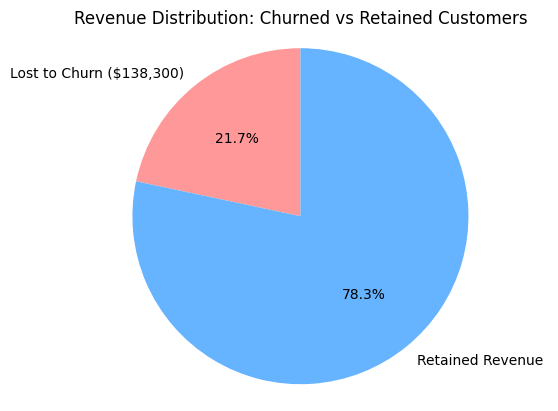

In [32]:
#Input data
labels = ['Lost to Churn ($138,300)', "Retained Revenue"]
sizes = [138300, 500000]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels = labels, colors = colors, autopct= '%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Revenue Distribution: Churned vs Retained Customers")
plt.show()

### 11. Churn By Gender

In [33]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["Gender"]).count()
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["Gender"]).count()



,Churn
Gender,
Female,939
Male,930


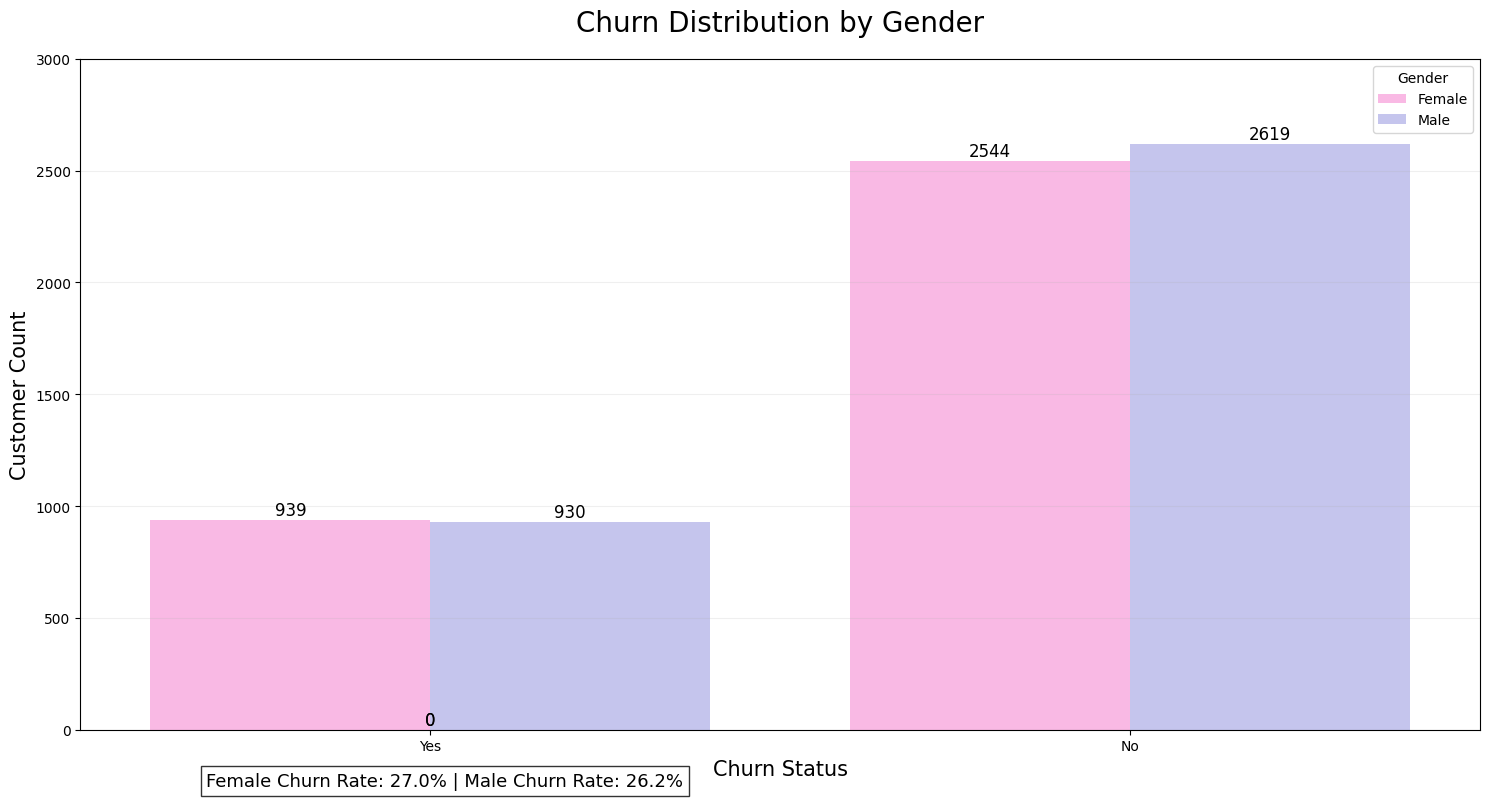

In [34]:
# Data preparation
churn_data = {
    'Churn': ['Yes']*2 + ['No']*2,
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Count': [939, 930, 2544, 2619]
}

# Create plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    x='Churn',
    y='Count',
    hue='Gender',
    data=churn_data,
    palette=['#ffb3e6', '#c2c2f0'],  # Pink for Female, Lavender for Male
    saturation=0.85
)

# Add annotations and styling
plt.title('Churn Distribution by Gender', fontsize=20, pad=20)
plt.xlabel('Churn Status', fontsize=15)
plt.ylabel('Customer Count', fontsize=15)
plt.ylim(0, 3000)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 7),
        textcoords='offset points',
        fontsize=12
    )

# Calculate and display churn rates
female_rate = 939 / (939 + 2544) * 100
male_rate = 930 / (930 + 2619) * 100

plt.figtext(0.3, 0.01,
            f"Female Churn Rate: {female_rate:.1f}% | Male Churn Rate: {male_rate:.1f}%",
            ha="center", fontsize=13, bbox={"facecolor":"white", "alpha":0.8})

# Adjust legend position
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

In [35]:
#Summary of Key Insights
sum = pd.DataFrame(
    {"Factor": ["Contract", "Internet Type", "Monthly Charges", "Tech Support", "Tenure"],
    "High Churn Risk": ["Month-to-month (45%)", "Fiber Optic (42%)", ">$70", "No (42%", "<12 Months"],
    "Low Churn Risk": ['Two-year (12%)', 'No Internet (7%)', '<$50', "Yes (15%)", ">24 Months"]},
    index = ["Contract", "Internet Type", "Monthly Charges", "Tech Support", "Tenure"]

)
sum


,Factor,High Churn Risk,Low Churn Risk
Contract,Contract,Month-to-month (45%),Two-year (12%)
Internet Type,Internet Type,Fiber Optic (42%),No Internet (7%)
Monthly Charges,Monthly Charges,>$70,<$50
Tech Support,Tech Support,No (42%,Yes (15%)
Tenure,Tenure,<12 Months,>24 Months


### Detect Outliers

Using Boxplot to examine all the numerical variables in the dataset.

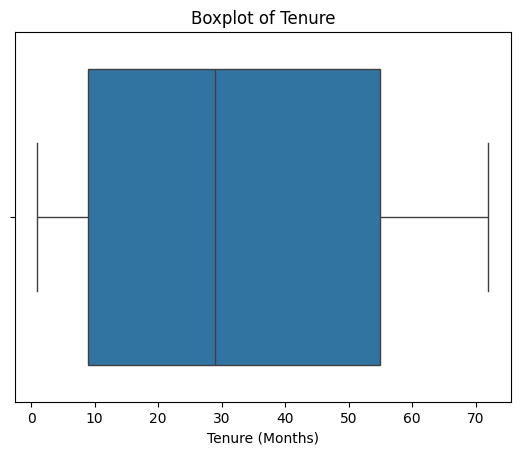

In [36]:
# Create a boxplot for the 'Tenure' column to visually inspect outliers
sns.boxplot(x=df["Tenure"])

# Show the plot
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure (Months)")
plt.show()

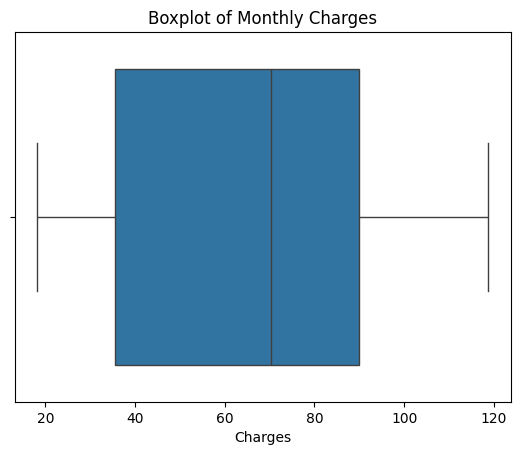

In [37]:
# Create a boxplot for the 'MonthlyCharges' column to visually inspect outliers
sns.boxplot(x=df["MonthlyCharges"])

# Show the plot
plt.title("Boxplot of Monthly Charges")
plt.xlabel("Charges")
plt.show()

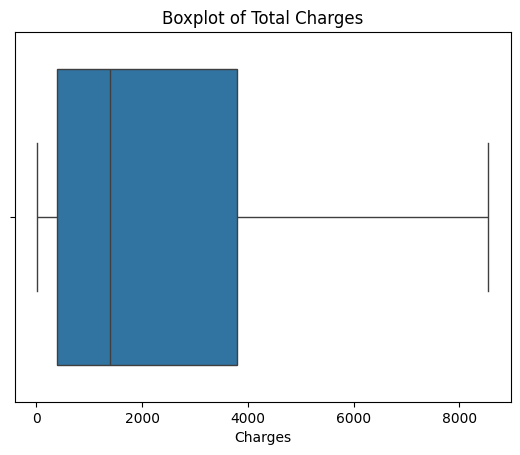

In [38]:
# Create a boxplot for the 'TotalChargesNew' column to visually inspect outliers
sns.boxplot(x=df["TotalCharges"])

# Show the plot
plt.title("Boxplot of Total Charges")
plt.xlabel("Charges")
plt.show()

It can be observed that there are no outliers in the dataset.

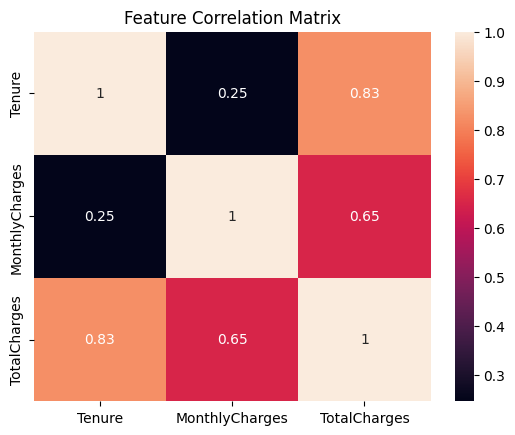

In [39]:
# Convert floats to numeric
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['Tenure', 'MonthlyCharges', 'TotalCharges'], inplace=True)




# Correlation Matrix for Key Features
corr_matrix = df[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Encode Categories


## Feature Encoding
### Split & Train Dataset

> Add blockquote



We need to transform the categorical columns to numeric because models does not work well with categorical  columns.

In [41]:
X = df.drop(columns=["Churn","CustomerID"], axis=1)
y = df["Churn"]

In [42]:
# To select categorical columns of variable x
cat_cols = X.select_dtypes(include= ["object"]).columns.tolist()

# Display the categorical columns
cat_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Using LabelEncoder

In [43]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Loop through each categorical column in the dataset
for col in cat_cols:
  # Apply label encoding to convert categorical values into numeric labels
    X[col] = le.fit_transform(X[col])

In [44]:
# Display Transformed X
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40


In [45]:
#convert 'yes' to 1 and 'no' to 0 in the y data

y = y.apply(lambda x: 1 if x == 'Yes' else 0)
print(y.head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [50]:
#Check current data types in X
print("Current data types in X:")
print(X.dtypes)

Current data types in X:
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [52]:
# Get all object (categorical) columns from X
remaining_cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {remaining_cat_cols}")

# Initialize the LabelEncoder object
le = LabelEncoder()

# Loop through each remaining categorical column
for col in remaining_cat_cols:
    X[col] = le.fit_transform(X[col])

# Verify all columns are now numeric
print(f"\nData types after encoding:")
print(X.dtypes)

Categorical columns to encode: []

Data types after encoding:
Gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
Tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


There is class imbalance, the customers that churned are under represented. This may lead to bias toward the majority class and may also affect the overall model accuracy and robustness, however, we will simply be using **class_weight='balanced'** in our standard algorithms (Random Forest, Logistic Regression etc)  which is sufficient to handle the bias toward the majority class.

In [53]:
# Now proceed with RUSBoost
print(f"\nOriginal class distribution:")
print(y.value_counts())
print(f"Imbalance ratio: {y.value_counts().max()/y.value_counts().min():.2f}:1")



Original class distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Imbalance ratio: 2.76:1


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (5625, 19)
Test set size: (1407, 19)


In [58]:
# Feature Scaling(Standardize)
scaler = StandardScaler()

# Fit scaler on both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[ 0.99627361, -0.43931886,  1.02831173, ..., -0.53531773,
         0.98155578,  1.69105196],
       [ 0.99627361, -0.43931886, -0.97246775, ...,  0.40332386,
        -0.97154551, -0.60355015],
       [-1.00374033, -0.43931886,  1.02831173, ..., -0.53531773,
         0.83706615,  1.68570723],
       ...,
       [-1.00374033, -0.43931886,  1.02831173, ..., -0.53531773,
         0.92674937,  0.4587522 ],
       [-1.00374033, -0.43931886,  1.02831173, ...,  1.34196545,
         0.02991714, -0.72254174],
       [ 0.99627361,  2.27625101, -0.97246775, ...,  0.40332386,
         0.32221802, -0.97957237]])

In [59]:
X_test_scaled

array([[-1.00374033, -0.43931886,  1.02831173, ..., -0.53531773,
         0.36373803,  0.95875881],
       [-1.00374033, -0.43931886, -0.97246775, ..., -1.47395931,
         0.45009965, -0.77055627],
       [-1.00374033, -0.43931886, -0.97246775, ...,  1.34196545,
        -1.49137604, -0.53497053],
       ...,
       [ 0.99627361, -0.43931886, -0.97246775, ...,  1.34196545,
        -1.51296645, -0.98676465],
       [ 0.99627361, -0.43931886, -0.97246775, ...,  1.34196545,
        -0.81210867, -0.35243611],
       [-1.00374033, -0.43931886, -0.97246775, ..., -0.53531773,
        -1.48971524, -0.56923834]])